# Named Entity Recognition (NER)
* NLP task to identify important named entities in text  
  * People, places, organizations  
  * Dates, states, works of art  
* Can be used alongside topic identification  
* Who, What, When, Where

Example, using stanford NER library, can extract facts and related entities

* NLTK allows interaction with NER using own model  
* but can use stanford CoreNLP library  (Java Based)  
* support for NER as well as coreference and dependency trees  

using simple built-in

## POS LIST
POS tag list:

CC coordinating conjunction  
CD cardinal digit  
DT determiner  
EX existential there (like: "there is" ... think of it like "there exists")  
FW foreign word  
IN preposition/subordinating conjunction  
JJ adjective 'big'  
JJR adjective, comparative 'bigger'  
JJS adjective, superlative 'biggest'  
LS list marker 1)  
MD modal could, will  
NN noun, singular 'desk'  
NNS noun plural 'desks'  
NNP proper noun, singular 'Harrison'  
NNPS proper noun, plural 'Americans'  
PDT predeterminer 'all the kids'  
POS possessive ending parent's  
PRP personal pronoun I, he, she  
PRP\\$ possessive pronoun my, his, hers  
RB adverb very, silently,  
RBR adverb, comparative better  
RBS adverb, superlative best  
RP particle give up  
TO to go 'to' the store.  
UH interjection errrrrrrrm  
VB verb, base form take  
VBD verb, past tense took  
VBG verb, gerund/present participle taking  
VBN verb, past participle taken  
VBP verb, sing. present, non-3d take  
VBZ verb, 3rd person sing. present takes  
WDT wh-determiner which  
WP wh-pronoun who, what  
WP\\$ possessive wh-pronoun whose  
WRB wh-abverb where, when  

In [3]:
import nltk
sentence = '''In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl.'''
tokenized_sent = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokenized_sent)

In [7]:
GPE: GeoPoliticalEntities
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


## Example

In [9]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

In [15]:
from nltk import word_tokenize, sent_tokenize
sentences = sent_tokenize(article)
token_sentences = [word_tokenize(sent) for sent in sentences]
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

In [17]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label') and chunk.label() == 'NE':
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


## charting practice

In [19]:
from collections import defaultdict
ner_categories = defaultdict(int)

chunked_sentences = nltk.ne_chunk_sents(pos_sentences)
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1

labels = list(ner_categories.keys())
values = [ner_categories.get(v) for v in labels]

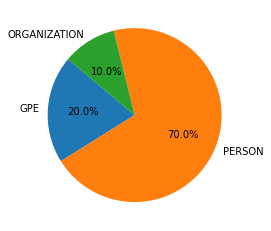

In [23]:
import matplotlib.pyplot as plt
plt.pie(values, labels=labels,
       autopct='%1.1f%%', startangle=140)
plt.show()

# SpaCy
* Similar to gensim  
* Focus on creating NLP pipelines to generate models and corpora
* Displacy: interactive node.js data visualization tool
  * https://demos.explosion.ai/displacy-ent/

In [29]:
#!python -m spacy download en

In [28]:
import spacy

# Loads something similar to gensim dictionary and corpus
nlp = spacy.load('en')
# Entity recognizer object from spacy.pipeline module
nlp.entity

In [32]:
doc = nlp ("""Berlin is the capital of Germany; 
                and the residence of Chancellor Angela Merkel.""")
doc.ents

(Berlin, Germany, Angela Merkel)

In [33]:
print(doc.ents[0], doc.ents[0].label_)

Berlin GPE


Spacy NER
* Has pipeline creation  
* Had different entity types compared to nltk  
* informal language corpora  
  * Easily find entities in tweets or chat msgs  

## Examples

In [36]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

In [37]:
nlp = spacy.load('en', tagger=False, parser=False, matcher=False) # args improve processing tim

In [43]:
doc = nlp(article)
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG unroll.me
ORG Apple
PERSON Travis Kalanick
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


# Multilingual NER - polyglot
* uses word vectors
* more than 130 languages  
Spanish as example

In [60]:
from polyglot.text import Text

ImportError: cannot import name 'Locale' from 'icu' (/Users/jvschoen/src/datacamp/venv/lib/python3.7/site-packages/icu/__init__.py)

In [61]:
article = "\ufeffédition abonné\r\n\r\n\r\nDans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu.\r\n\r\n\r\nLe Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles)\r\n\r\n\r\nTRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs supplémentaires. Il est vrai que l’intelligence artificielle (IA) est bien en peine de reconnaître des contenus violents, surtout diffusés en direct.\r\n\r\n\r\nLe quotidien affreux de ces modérateurs, contraints de visionner des horreurs à longueur de journée, mériterait pourtant qu’on les remplace vite par des machines !\r\n\r\n\r\nL’IA ne peut pas tout, mais là où elle peut beaucoup, on la maudit, accusée de détruire nos emplois, de remplacer la convivialité humaine. Ce débat repose sur un malentendu.\r\n\r\n\r\nIl vient d’une définition de l’IA qui n’a, dans la réalité, jamais pu être mise en pratique : en 1955, elle était vue comme la création de programmes informatiques qui, quoi qu’on leur confie, le feraient un jour mieux que les humains. On pensait que toute caractéristique de l’intelligence humaine pourrait un jour être si précisément décrite qu’il suffirait d’une machine pour la simuler. Ce n’est pas vrai.\r\n\r\n\r\nAngoisses infondées\r\n\r\n\r\nComme le dit un récent Livre blanc sur la question (Pourquoi il ne faut pas avoir peur de l’Intelligence arti\xadficielle, Julien Maldonato, Deloitte, mars 2017), rien ne pourra remplacer un humain dans sa globalité.\r\n\r\n\r\nL’IA, c’est de l’apprentissage automatique doté d’un processus d’ajustement de modèles statistiques à des masses de données, explique l’auteur. Il s’agit d’un apprentissage sur des paramètres pour lesquels une vision humaine n’explique pas pourquoi ils marchent si bien dans un contexte donné.\r\n\r\n\r\nC’est aussi ce que dit le rapport de l’Office parlementaire d’évaluation des choix scientifiques et technologiques (« Pour une intelligence artificielle maîtrisée, utile et démystifiée », 29 mars 2017), pour qui ce côté « boîte noire » explique des angoisses infondées. Ethiquement, se fonder sur l’IA pour des tâches critiques sans bien comprendre le comment..."

In [ ]:
txt = Text(article)
for ent in txt.entities:
    print(ent)

print(type(ent))